## Heart disease diagnosis using a classification model
## by Charla Gaddy

This is an attempt to determine if a person has heart disease or not.  The data set comes from https://archive.ics.uci.edu/ml/datasets/heart+Disease.  The Cleveland dataset has 303 instances and 75 attributes but we will be using 14 of the attributes.

### Data attributes

This data from Cleveland contains 76 attributes, but all published experiments refer to using a subset of 14 of them. The “target" field refers to the presence of heart disease in the patient.

* age: Age in years
* sex: Sex (1 = Male, 0 = Female)
* cp: Chest Pain Type (0-4)
    - 0, Typical angina - Chest pain related decrease blood supply to the heart
    - 1, Atypical angina - Chest pain not related to heart
    - 2, Non-anginal pain - Typically esophageal spasms (non heart related)
    - 3, Asymptomatic - Chest pain not showing signs of disease
* trestbps: Resting blood pressure upon admission (mm Hg)
    Anything above 130-140 is typically cause for concern
* chol: Serum cholestrol level (mg/dL)
    serum = LDL + HDL + .2 * triglycerides
    Above 200 is cause for concern
* fbs: Fasting blood sugar > 120 mg/dL (1 = True, 0 = False)
       fbs > 126 mg/dL signals diabetes
* restecg: Resting electrocardiographic results (0 - 2)
    - 0, Nothing to note
    - 1, ST-T Wave abnormality
        Can range from mild symptoms to severe problems
        Signals non-normal heart beat
    - 2, Possible or definite Left ventricular hypertrophy
        Enlarged heart's main pumping chamber
* thalach: Maximum heart rate achieved
    Rate above 100 is cause for concern
* exang: exercise induced angina (1 = yes; 0 = no)
* oldpeak: ST depression induced by exercise relative to rest
    Looks at stress of heart during exercise
    Unhealthy heart will stress more
* slope: the slope of the peak exercise ST segment
    - 0, upsloping - Better heart rate with exercise (uncommon)
    - 1, flatsloping - Minimal change (typical healthy heart)
    - 2, downsloping - Signs of unhealthy heart
* ca: number of major vessels (0-3) colored by flourosopy
    Colored vessel means the doctor can see the blood passing through
    Move blood movement the better (no clots)
* thal: Thalium stress test result - Sees how blood moves through your heart while exercising
    - 1, Normal
    - 6, fixed defect, Used to be defect but now okay
    - 7, reversible defect, Not proper blood movement when exercising
* target: Heart Disease (1 = True, 0 = False)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
sns.set_style("white")

In [5]:
df=pd.read_csv('heart.csv')
dfx=df #maintain original data

In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [8]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [9]:
# Rename columns
df.rename(columns={
    'cp':'chest_pain',
    'trestbps' : 'resting_bp',
    'fbs': 'fasting_blood_sugar',
    'chol' : 'cholesterol',
    'restecg': 'resting_ecg',
    'thalach':'max_heart_rate',
    'exang':'exercise_angina',
    'ca':'num_major_vessels',
    'thal':'thalium_stress_test'
}, inplace=True)

In [10]:
df.info(), df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age                    303 non-null int64
sex                    303 non-null int64
chest_pain             303 non-null int64
resting_bp             303 non-null int64
cholesterol            303 non-null int64
fasting_blood_sugar    303 non-null int64
resting_ecg            303 non-null int64
max_heart_rate         303 non-null int64
exercise_angina        303 non-null int64
oldpeak                303 non-null float64
slope                  303 non-null int64
num_major_vessels      303 non-null int64
thalium_stress_test    303 non-null int64
target                 303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


(None, (303, 14))

In [11]:
#check for nan values
df.isnull().sum()

age                    0
sex                    0
chest_pain             0
resting_bp             0
cholesterol            0
fasting_blood_sugar    0
resting_ecg            0
max_heart_rate         0
exercise_angina        0
oldpeak                0
slope                  0
num_major_vessels      0
thalium_stress_test    0
target                 0
dtype: int64

In [12]:
df.head()

,age,sex,chest_pain,resting_bp,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak,slope,num_major_vessels,thalium_stress_test,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [13]:
# all the unique values of each attribute
for var in df:
    print(var,'\n',df[var].unique(),'\n')

age 
 [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77] 

sex 
 [1 0] 

chest_pain 
 [3 2 1 0] 

resting_bp 
 [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164] 

cholesterol 
 [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 166 311 1

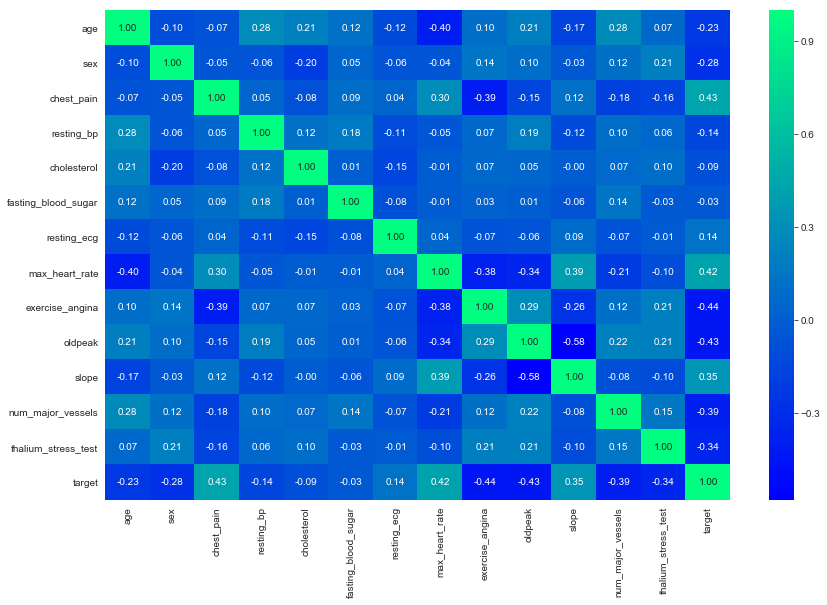

In [14]:
#Is there collinearity?
plt.figure(figsize=(14, 9))
sns.heatmap(data = df.corr(), cmap="winter", fmt=".2f", annot=True)

In [15]:
corrmat=df.corr()
corrmat

,age,sex,chest_pain,resting_bp,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak,slope,num_major_vessels,thalium_stress_test,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
chest_pain,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
resting_bp,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
cholesterol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fasting_blood_sugar,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
resting_ecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
max_heart_rate,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exercise_angina,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


*  no high correlation detected

In [16]:
##Lets look at Variance Inflation Factor and check for multicolinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
X = add_constant(df)
pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)

const                  212.998773
age                      1.443937
sex                      1.231356
chest_pain               1.397152
resting_bp               1.180747
cholesterol              1.152971
fasting_blood_sugar      1.087698
resting_ecg              1.066721
max_heart_rate           1.653567
exercise_angina          1.440147
oldpeak                  1.744666
slope                    1.662325
num_major_vessels        1.290729
thalium_stress_test      1.191528
target                   2.072754
dtype: float64

Multicolinearity is the state where two variables are highly correlated and contain similiar information about the variance within a given dataset. All vif values are low which is an indication of no correlation. 

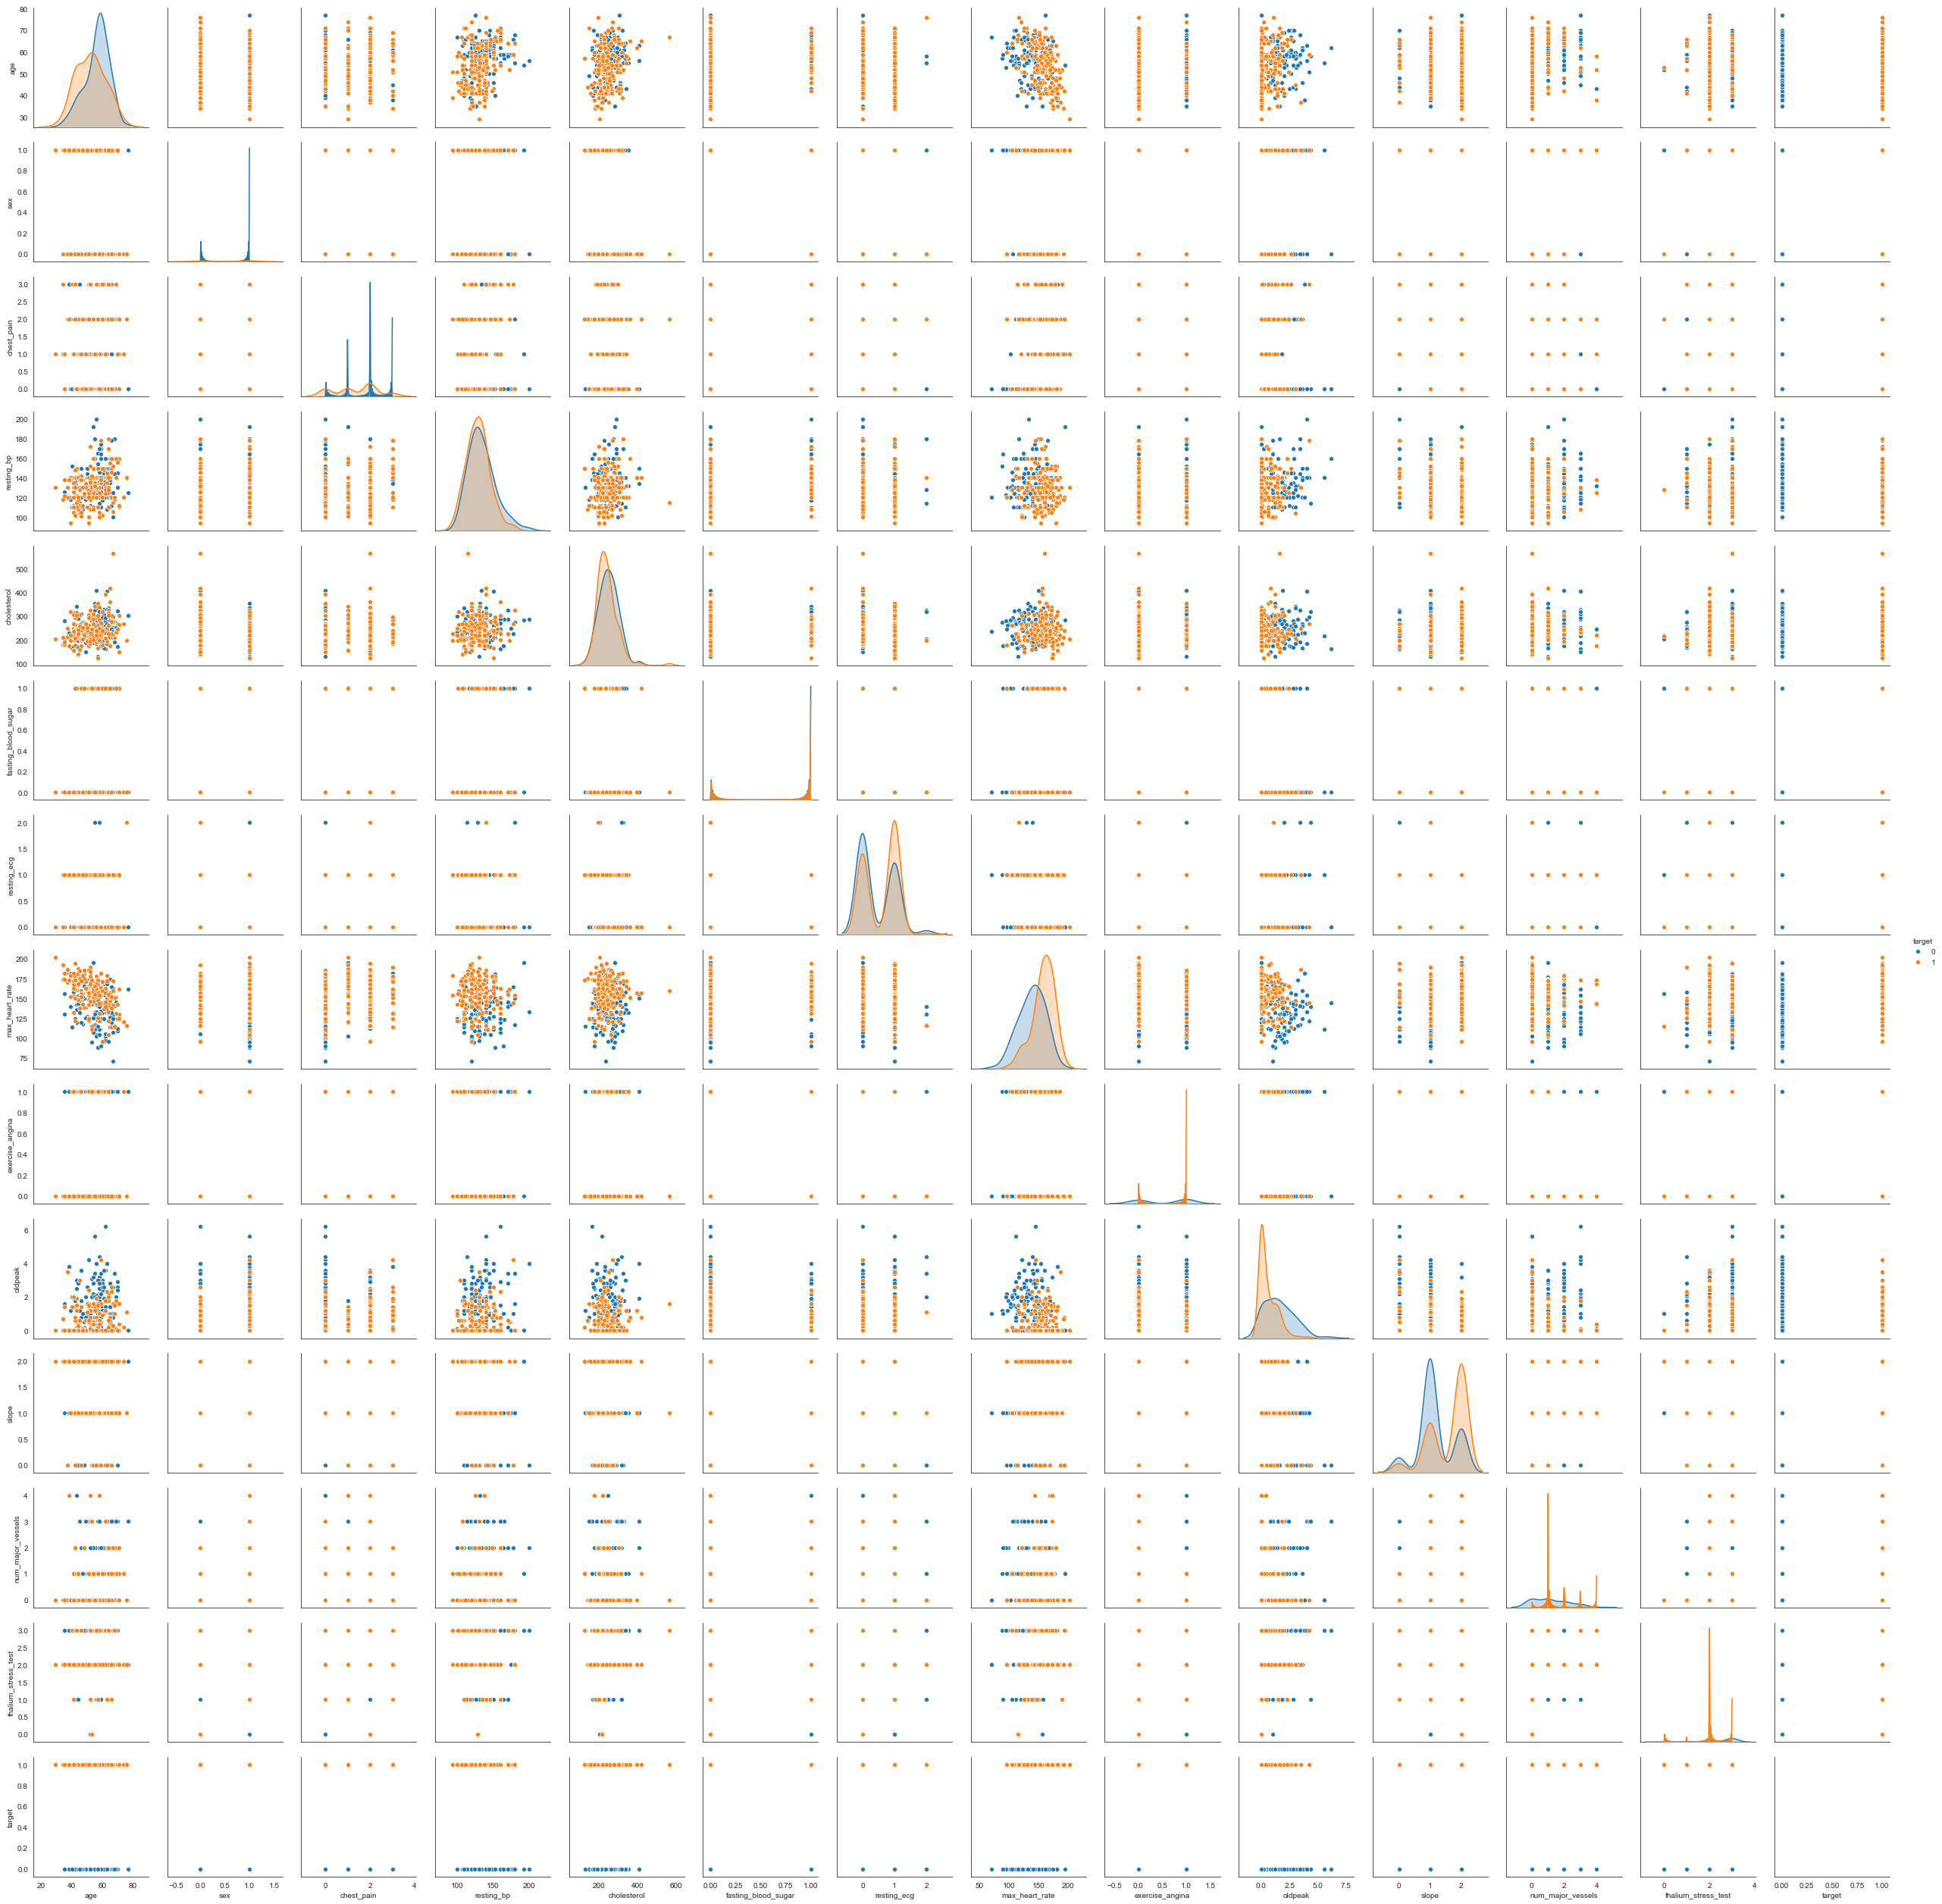

In [17]:
h = sns.pairplot(df, hue="target")

In [18]:
#Getting all the unique numerical variables
unique_vars=[]

print('all unique variables are:')
for var in df.columns:
    count=df[var].nunique()
    print(var, '----->',count)
    if count<10:
        unique_vars.append(var) 
unique_vars   

all unique variables are:
age -----> 41
sex -----> 2
chest_pain -----> 4
resting_bp -----> 49
cholesterol -----> 152
fasting_blood_sugar -----> 2
resting_ecg -----> 3
max_heart_rate -----> 91
exercise_angina -----> 2
oldpeak -----> 40
slope -----> 3
num_major_vessels -----> 5
thalium_stress_test -----> 4
target -----> 2


['sex',
 'chest_pain',
 'fasting_blood_sugar',
 'resting_ecg',
 'exercise_angina',
 'slope',
 'num_major_vessels',
 'thalium_stress_test',
 'target']

In [19]:
#how many unique values do we have
for var in unique_vars:
    print(var,'\n--------------------\n',df[var].value_counts(),'\n')

sex 
--------------------
 1    207
0     96
Name: sex, dtype: int64 

chest_pain 
--------------------
 0    143
2     87
1     50
3     23
Name: chest_pain, dtype: int64 

fasting_blood_sugar 
--------------------
 0    258
1     45
Name: fasting_blood_sugar, dtype: int64 

resting_ecg 
--------------------
 1    152
0    147
2      4
Name: resting_ecg, dtype: int64 

exercise_angina 
--------------------
 0    204
1     99
Name: exercise_angina, dtype: int64 

slope 
--------------------
 2    142
1    140
0     21
Name: slope, dtype: int64 

num_major_vessels 
--------------------
 0    175
1     65
2     38
3     20
4      5
Name: num_major_vessels, dtype: int64 

thalium_stress_test 
--------------------
 2    166
3    117
1     18
0      2
Name: thalium_stress_test, dtype: int64 

target 
--------------------
 1    165
0    138
Name: target, dtype: int64 



In [20]:
#change the data types for attributes less than 10 
df['sex'] = df['sex'].astype('object')
df['fasting_blood_sugar'] = df['fasting_blood_sugar'].astype('object')
df['exercise_angina'] = df['exercise_angina'].astype('object')
df['chest_pain'] = df['chest_pain'].astype('object')
df['resting_ecg'] = df['resting_ecg'].astype('object')
df['slope'] = df['slope'].astype('object')
df['thalium_stress_test'] = df['thalium_stress_test'].astype('object')
df['num_major_vessels'] = df['num_major_vessels'].astype('object')
df['target'] = df['target'].astype('object')

In [42]:
gender_map = {0 : 'female', 1: 'male'}
df["sex"] = df["sex"].map(gender_map)


hd_map = {0 : 'no_hd', 1: 'hd'}
df["target"] = df["target"].map(hd_map)

#### Categorical data - ready to analyse with respect to the target variable

In [22]:
# select all categorical variables
categorical = df.select_dtypes(include=['object'])

#categorical = [var for var in df.columns if df[var].dtype=='O']
for cats in categorical:
    print('\n\n' +cats+'\n****************')
    print(df[cats].value_counts())



sex
****************
male      207
female     96
Name: sex, dtype: int64


chest_pain
****************
0    143
2     87
1     50
3     23
Name: chest_pain, dtype: int64


fasting_blood_sugar
****************
0    258
1     45
Name: fasting_blood_sugar, dtype: int64


resting_ecg
****************
1    152
0    147
2      4
Name: resting_ecg, dtype: int64


exercise_angina
****************
0    204
1     99
Name: exercise_angina, dtype: int64


slope
****************
2    142
1    140
0     21
Name: slope, dtype: int64


num_major_vessels
****************
0    175
1     65
2     38
3     20
4      5
Name: num_major_vessels, dtype: int64


thalium_stress_test
****************
2    166
3    117
1     18
0      2
Name: thalium_stress_test, dtype: int64


target
****************
hd       165
no_hd    138
Name: target, dtype: int64


#### Categorical Visulizations

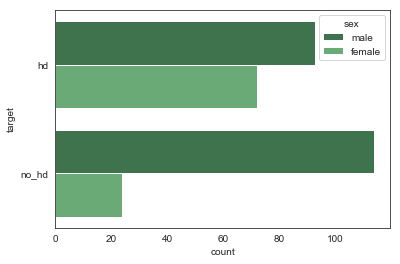

sex     female  male
target              
hd          72    93
no_hd       24   114


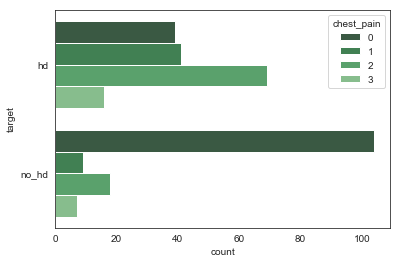

chest_pain    0   1   2   3
target                     
hd           39  41  69  16
no_hd       104   9  18   7


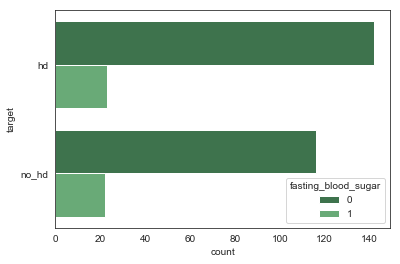

fasting_blood_sugar    0   1
target                      
hd                   142  23
no_hd                116  22


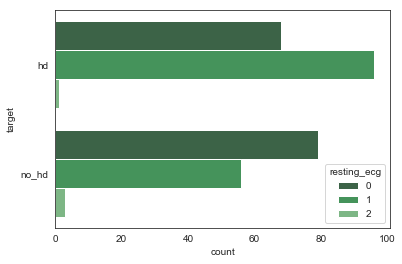

resting_ecg   0   1  2
target                
hd           68  96  1
no_hd        79  56  3


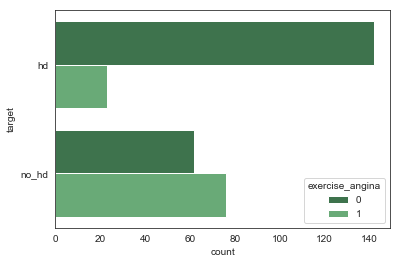

exercise_angina    0   1
target                  
hd               142  23
no_hd             62  76


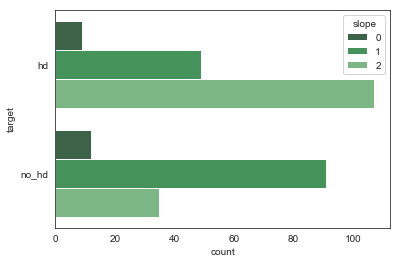

slope    0   1    2
target             
hd       9  49  107
no_hd   12  91   35


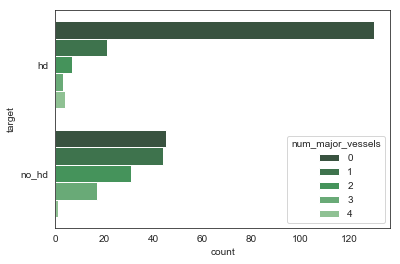

num_major_vessels    0   1   2   3  4
target                               
hd                 130  21   7   3  4
no_hd               45  44  31  17  1


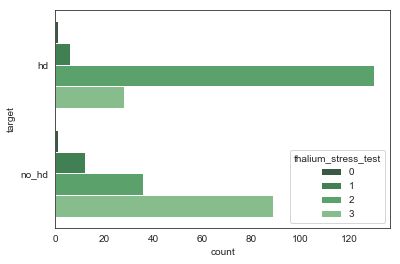

thalium_stress_test  0   1    2   3
target                             
hd                   1   6  130  28
no_hd                1  12   36  89


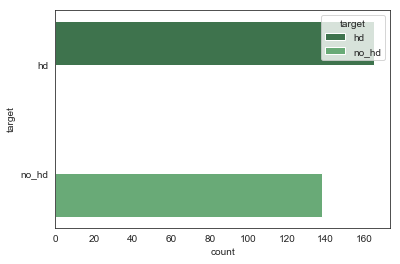

target   hd  no_hd
target            
hd      165      0
no_hd     0    138


In [23]:
for cat in categorical:
    sns.countplot(y="target", hue=cat, data=df, palette="Greens_d")
    plt.show()

    # Table of counts
    counttable = pd.crosstab(df['target'], df[cat])
    print(counttable)

### highest Heart Disease accurance 
    -  chest pain - value of 2
    -  resting_ecg - value of 1
    -  slope - value of 2
    -  vessels - value of 0
    -  stress test - value of 2

In [24]:
df.head()

,age,sex,chest_pain,resting_bp,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak,slope,num_major_vessels,thalium_stress_test,target
0,63,male,3,145,233,1,0,150,0,2.3,0,0,1,hd
1,37,male,2,130,250,0,1,187,0,3.5,0,0,2,hd
2,41,female,1,130,204,0,0,172,0,1.4,2,0,2,hd
3,56,male,1,120,236,0,1,178,0,0.8,2,0,2,hd
4,57,female,0,120,354,0,1,163,1,0.6,2,0,2,hd


#### Numerical data

In [25]:
# age, resting_bp, cholesterol, max_heart_rate, oldpeak
numerical = [var for var in df.columns if df[var].dtype!='O']
#for nums in numerical:
#    print('\n\n' +nums+'\n****************')
#    print(df[nums].value_counts())

In [26]:
# Checking for outliers in the continuous variables
numerical_df = df[numerical]

# Checking outliers at 25%,50%,75%,90%,95% and 99%
numerical_df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,age,resting_bp,cholesterol,max_heart_rate,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
90%,66.000000,152.000000,308.800000,176.600000,2.800000
95%,68.000000,160.000000,326.900000,181.900000,3.400000
99%,71.000000,180.000000,406.740000,191.960000,4.200000


There are no significant outliners.  The value of each attribute progresses gradually.  There aren't any 
hugh jumps when ascending to each percentile.

#### Numerical Visulizations

''

<Figure size 1440x720 with 0 Axes>

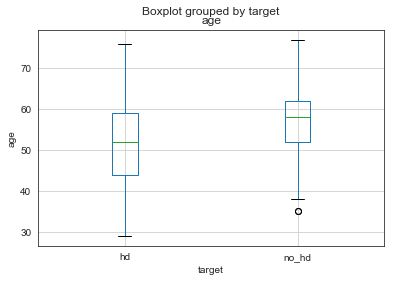

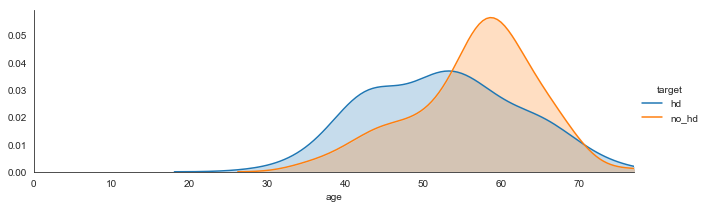

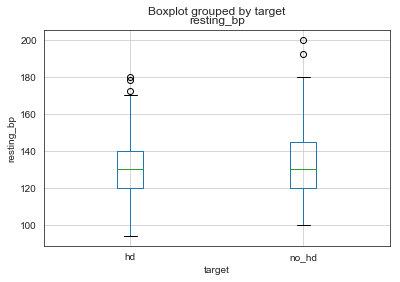

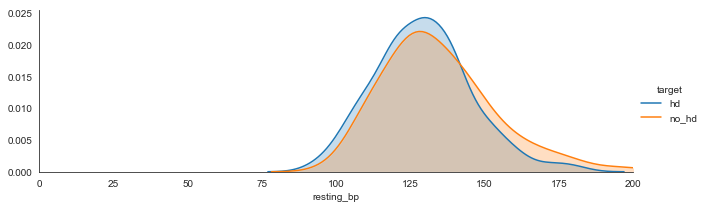

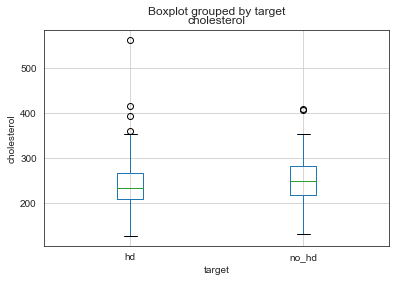

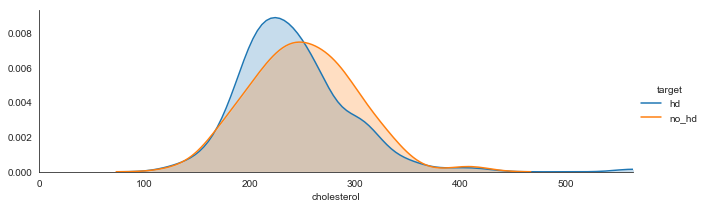

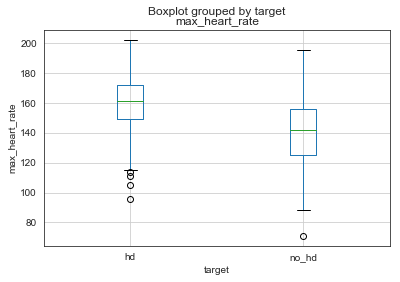

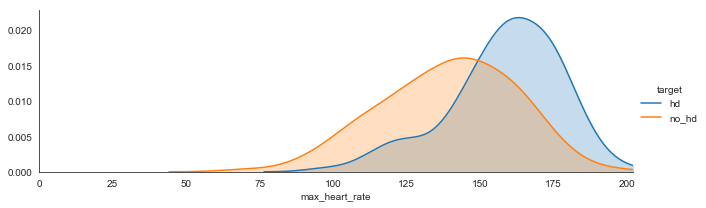

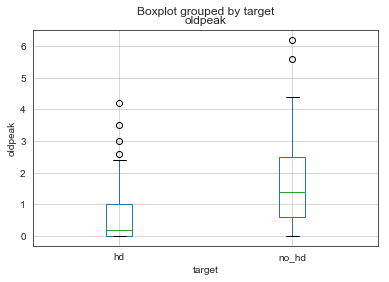

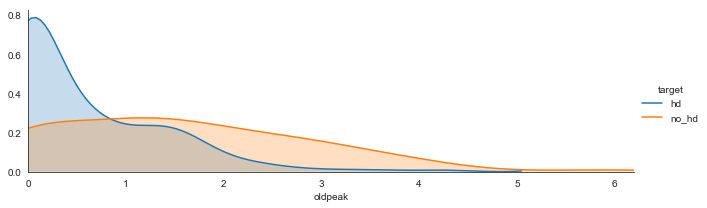

In [27]:
plt.rcParams.update({'font.size': 10})
plt.figure(figsize=(20,10))

#plt.figure(figsize=(24,12))

for var in numerical:
    df.boxplot(column = var,by = 'target')
    plt.xticks()
    plt.xlabel('target')
    plt.ylabel(var)
    
    facet = sns.FacetGrid(df, hue = "target", aspect = 3)
    facet.map(sns.kdeplot,var,shade= True)
    facet.set(xlim=(0, df[var].max()))
    facet.add_legend()
;

### highest Heart Disease accurance 
    - mean age ~ 52
    - mean resting bp ~ 130
    - mean cholesterol ~ 230
    - mean oldpeak ~ 0.2

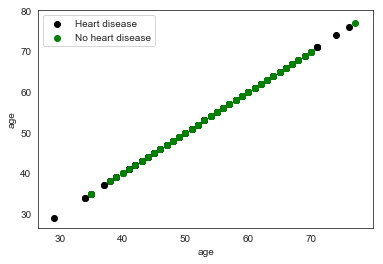

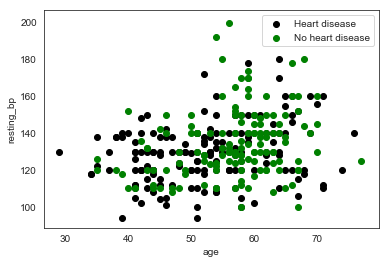

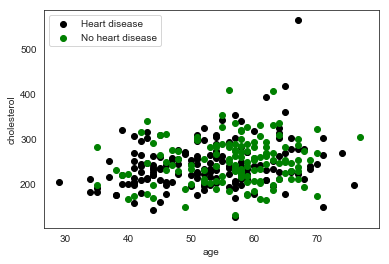

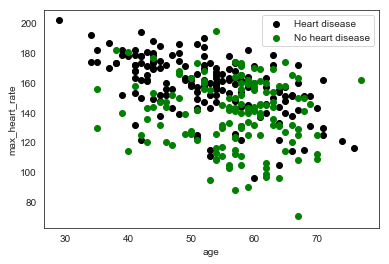

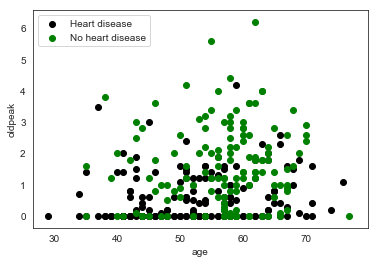

In [28]:
#Let's look at the age with respect to the other categorical variables
for var in numerical_df: 
    plt.scatter(x=df['age'][df.target=='hd'], y=df[var][(df.target=='hd')], c="black")
    plt.scatter(x=df['age'][df.target=='no_hd'], y=df[var][(df.target=='no_hd')], c="green")
    plt.legend(["Heart disease", "No heart disease"])
    plt.xlabel('age')
    plt.ylabel(var)
    plt.show()

Between the age of 45 to 55 heart disese diagnosis is more prevalent.
resting BP, heart rate and cholesterol increases as the age increases
 

In [29]:
#group the ages
plt.rcParams.update({'font.size': 15})
#agebins = [0,35, 40, 45,50, 55, 60,65, 70,95]
agebins = range(0,100,5)
df['binned_age'] = pd.cut(df['age'], agebins)
print('number of people per bin')
print('------------------------------')
print(df.groupby('age')['target'].count().reset_index())

number of people per bin
------------------------------
    age  target
0    29       1
1    34       2
2    35       4
3    37       2
4    38       3
5    39       4
6    40       3
7    41      10
8    42       8
9    43       8
10   44      11
11   45       8
12   46       7
13   47       5
14   48       7
15   49       5
16   50       7
17   51      12
18   52      13
19   53       8
20   54      16
21   55       8
22   56      11
23   57      17
24   58      19
25   59      14
26   60      11
27   61       8
28   62      11
29   63       9
30   64      10
31   65       8
32   66       7
33   67       9
34   68       4
35   69       3
36   70       4
37   71       3
38   74       1
39   76       1
40   77       1


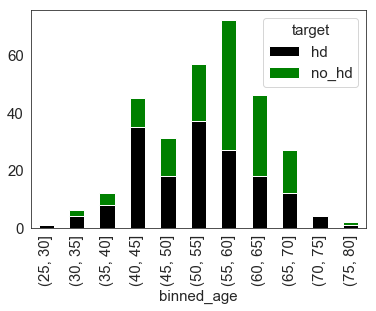

In [32]:
df_age = df.groupby(['binned_age','target'])['binned_age'].count().unstack('target').fillna(0)
df_age.plot(kind='bar', stacked=True, color=['black', 'green'])

#### If we bin the age attribute, we can see the largest group with heart disease is between 45 and 55.

In [33]:
#t_bins = [35, 65, 95,125,155,185,215,245]
t_bins = range(35,240,10)
df['binned_heart_rate'] = pd.cut(df['max_heart_rate'], t_bins)

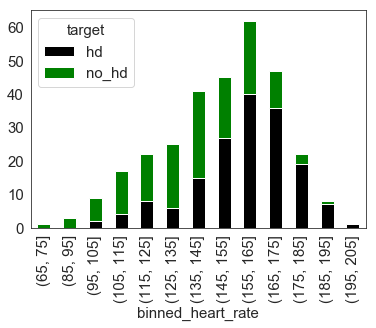

In [35]:
df_heart = df.groupby(['binned_heart_rate','target'])['binned_heart_rate'].count().unstack('target').fillna(0)
df_heart.plot(kind='bar', stacked=True, color=['black', 'green'])

### The heart rate bewteen 145-175 has the highest heart rate.

In [36]:
c_bins = range(0,500,50)
df['binned_cholesterol'] = pd.cut(df['cholesterol'],c_bins)

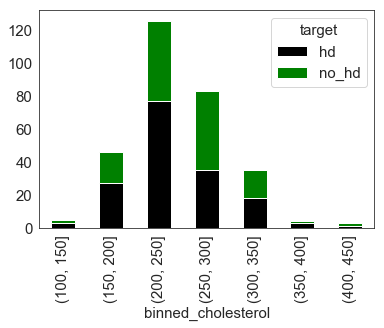

In [38]:
df_heart = df.groupby(['binned_cholesterol','target'])['binned_cholesterol'].count().unstack('target').fillna(0)
df_heart.plot(kind='bar', stacked=True, color=['black', 'green'])

### 200-250 is at hightest heart disease rate.

#### What is the baseline of the data?

In [39]:
gender_map = {'female':0, 'male':1}
df["sex"] = df["sex"].map(gender_map)


hd_map = {'no_hd':0, 'hd':1}
df["target"] = df["target"].map(hd_map)

In [40]:
target = (sum(df['target'])/len(df['target'].index))*100
print('My baseline : {:.2f}%'.format(target))

My baseline : 54.46%


hd       165
no_hd    138
Name: target, dtype: int64


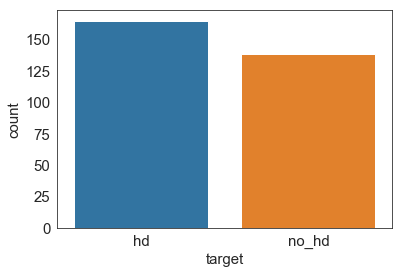

In [43]:
#baseline 165/(165+138) - if predict all ones
heart = df["target"]
sns.countplot(heart)
heart_temp = df.target.value_counts()
print(heart_temp)

#### The current data has a predictive rate of 54%.  We will run several models to beat this baseline, to predict more accurately if a person has heart disease of not.

In [44]:
df=df.drop(['binned_age','binned_heart_rate','binned_cholesterol'],axis=1)

#### dummy the categorical data 

In [45]:
#need to dummify chest_pain, resting_ecg, thalium stress test slope 
dummify_vars=['chest_pain','resting_ecg','thalium_stress_test','slope']
dummify=df[['chest_pain','resting_ecg','thalium_stress_test','slope']]

In [46]:
df_dummies= pd.get_dummies(dummify,drop_first=True)
df_dummies.head()

,chest_pain_1,chest_pain_2,chest_pain_3,resting_ecg_1,resting_ecg_2,thalium_stress_test_1,thalium_stress_test_2,thalium_stress_test_3,slope_1,slope_2
0,0,0,1,0,0,1,0,0,0,0
1,0,1,0,1,0,0,1,0,0,0
2,1,0,0,0,0,0,1,0,0,1
3,1,0,0,1,0,0,1,0,0,1
4,0,0,0,1,0,0,1,0,0,1


In [47]:
# concat df_categorical with original df
df = df.drop(['chest_pain','resting_ecg','thalium_stress_test','slope'], axis=1)
df = pd.concat([df, df_dummies], axis=1)
df.head()

,age,sex,resting_bp,cholesterol,fasting_blood_sugar,max_heart_rate,exercise_angina,oldpeak,num_major_vessels,target,chest_pain_1,chest_pain_2,chest_pain_3,resting_ecg_1,resting_ecg_2,thalium_stress_test_1,thalium_stress_test_2,thalium_stress_test_3,slope_1,slope_2
0,63,male,145,233,1,150,0,2.3,0,hd,0,0,1,0,0,1,0,0,0,0
1,37,male,130,250,0,187,0,3.5,0,hd,0,1,0,1,0,0,1,0,0,0
2,41,female,130,204,0,172,0,1.4,0,hd,1,0,0,0,0,0,1,0,0,1
3,56,male,120,236,0,178,0,0.8,0,hd,1,0,0,1,0,0,1,0,0,1
4,57,female,120,354,0,163,1,0.6,0,hd,0,0,0,1,0,0,1,0,0,1


In [48]:
df.shape

(303, 20)

--------------

## algorithms used to predict heart disease:

    1.) Naive Bayes
    2.) KNN
    3.) Logistic Regression
    4.) Random Forest
    5.) Support Vector Machine
    6.) Extreme Gradient Boost
   

In [49]:
df.to_csv('cleaned_heart_data.csv')

------------

### The target data is balanced.  The outliers are minimal. All the data is numerical so there is no need for one hot coding.  The variables are not correlated.  Categorical data was dummied.

### Because this sample dataset is so small, we will not use a hold out to fit the model.  We will just use the predictors and the target for this analysis.